In [2]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


<AxesSubplot:>

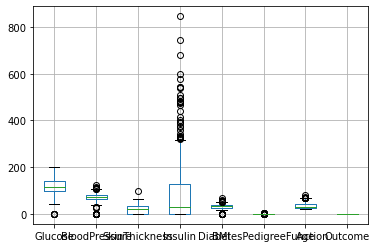

In [5]:
df.boxplot()

In [6]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

<AxesSubplot:ylabel='Outcome'>

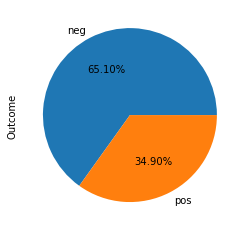

In [7]:
df['Outcome'].value_counts().plot(kind='pie',labels=['neg','pos'],autopct='%1.2f%%')

<AxesSubplot:>

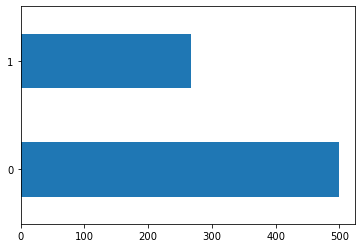

In [8]:
df['Outcome'].value_counts().plot(kind='barh')

In [9]:
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)
y1.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=11,stratify=y1)

In [11]:
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Outcome, dtype: float64

In [12]:
y_test.value_counts(normalize=True)

0    0.5
1    0.5
Name: Outcome, dtype: float64

In [13]:
dt_model=DecisionTreeClassifier(random_state=2)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=2)

In [14]:
# Testing Data Evaluation

y_pred = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)
print('**'*30)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy :', accuracy)
print('**'*30)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n', clf_report)

Confusion Matrix :
 [[77 23]
 [21 79]]
************************************************************
Accuracy : 0.78
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       100
           1       0.77      0.79      0.78       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [15]:
# Training Data Evaluation

y_pred_train = dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)
print('**'*30)

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy :', accuracy)
print('**'*30)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n', clf_report)

Confusion Matrix :
 [[400   0]
 [  0 400]]
************************************************************
Accuracy : 1.0
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [16]:
rf_model=RandomForestClassifier(random_state=2)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

In [17]:
# Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)
print('**'*30)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy :', accuracy)
print('**'*30)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n', clf_report)

Confusion Matrix :
 [[82 18]
 [18 82]]
************************************************************
Accuracy : 0.82
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       100
           1       0.82      0.82      0.82       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



In [18]:
# Training Data Evaluation

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)
print('**'*30)

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy :', accuracy)
print('**'*30)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n', clf_report)

Confusion Matrix :
 [[400   0]
 [  0 400]]
************************************************************
Accuracy : 1.0
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [19]:
rf_model = RandomForestClassifier(random_state=10)

hyp = {
    'n_estimators': np.arange(10,150),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(5,15),
    'min_samples_split':np.arange(5,20) ,
    'min_samples_leaf': np.arange(4,15) ,
    'max_features':['auto','log2'],    
    'random_state' : np.arange(1,10)
}

rscv_rf_clf = RandomizedSearchCV(rf_model, hyp, cv=5)
rscv_rf_clf.fit(x_train, y_train)
rscv_rf_clf.best_params_

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

{'random_state': 7,
 'n_estimators': 106,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini'}

In [22]:
rf_model=RandomForestClassifier(random_state=7,
 n_estimators= 106,
min_samples_split= 6,
 min_samples_leaf= 5,
 max_features= 'auto',
 max_depth= 9,
 criterion= 'gini',oob_score=True)

rf_model.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=9, max_features='auto', min_samples_leaf=5,
                       min_samples_split=6, n_estimators=106, oob_score=True,
                       random_state=7)

In [23]:
# Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)
print('**'*30)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy :', accuracy)
print('**'*30)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n', clf_report)

Confusion Matrix :
 [[78 22]
 [13 87]]
************************************************************
Accuracy : 0.825
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       100
           1       0.80      0.87      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



In [24]:
# Training Data Evaluation

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)
print('**'*30)

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy :', accuracy)
print('**'*30)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n', clf_report)

Confusion Matrix :
 [[346  54]
 [ 32 368]]
************************************************************
Accuracy : 0.8925
************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       400
           1       0.87      0.92      0.90       400

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



In [29]:
rf_model.oob_score_

0.79

In [30]:
rf_model.ccp_alpha

0.0

In [31]:
rf_model.criterion

'gini'

In [33]:
rf_model.feature_importances_

array([0.2950658 , 0.06661116, 0.05739937, 0.06645315, 0.20231825,
       0.12020334, 0.19194893])

<AxesSubplot:>

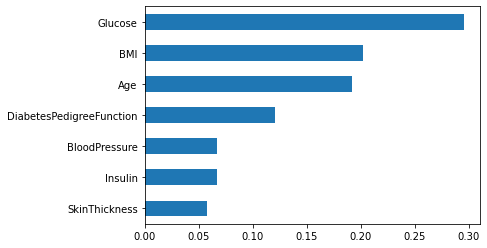

In [44]:
s1=pd.Series(rf_model.feature_importances_)
s1.index=x.columns
s1.sort_values().plot(kind='barh')
